In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
import seaborn as sns


In [49]:
samples_dir = '/lustre/home/acct-medlqian/medlqian-loop3/data/Hi_C/20250520_Trim66_HiC_20250609_46G/output'
usecols = ["chrom1", "pos1", "chrom2", "pos2", "pair_type"]
Het_1 = pd.read_csv(f'{samples_dir}/Het_1/Het_1.parsed.mapq30.sorted.deduped.valid.pairs.gz', sep="\t", comment="#", header=None,
                 names=["readID", "chrom1", "pos1", "chrom2", "pos2", "strand1", "strand2", "pair_type"],
                 usecols=usecols)
Het_2 = pd.read_csv(f'{samples_dir}/Het_2/Het_2.parsed.mapq30.sorted.deduped.valid.pairs.gz', sep="\t", comment="#", header=None,
                 names=["readID", "chrom1", "pos1", "chrom2", "pos2", "strand1", "strand2", "pair_type"],
                 usecols=usecols)

Het_3 = pd.read_csv(f'{samples_dir}/Het_3/Het_3.parsed.mapq30.sorted.deduped.valid.pairs.gz', sep="\t", comment="#", header=None,
                 names=["readID", "chrom1", "pos1", "chrom2", "pos2", "strand1", "strand2", "pair_type"],
                 usecols=usecols)

In [50]:
Het_all = pd.concat([Het_1, Het_2, Het_3], ignore_index=True)


In [51]:
Homo_1 = pd.read_csv(f'{samples_dir}/Homo_1/Homo_1.parsed.mapq30.sorted.deduped.valid.pairs.gz', sep="\t", comment="#", header=None,
                 names=["readID", "chrom1", "pos1", "chrom2", "pos2", "strand1", "strand2", "pair_type"],
                 usecols=usecols)
Homo_2 = pd.read_csv(f'{samples_dir}/Homo_2/Homo_2.parsed.mapq30.sorted.deduped.valid.pairs.gz', sep="\t", comment="#", header=None,
                 names=["readID", "chrom1", "pos1", "chrom2", "pos2", "strand1", "strand2", "pair_type"],
                 usecols=usecols)

Homo_3 = pd.read_csv(f'{samples_dir}/Homo_3/Homo_3.parsed.mapq30.sorted.deduped.valid.pairs.gz', sep="\t", comment="#", header=None,
                 names=["readID", "chrom1", "pos1", "chrom2", "pos2", "strand1", "strand2", "pair_type"],
                 usecols=usecols)

In [52]:
Homo_all = pd.concat([Homo_1, Homo_2, Homo_3], ignore_index=True)


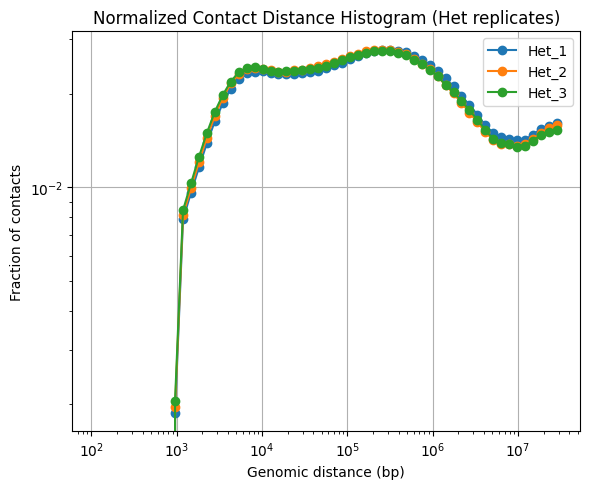

In [7]:
def get_distance_fraction(df, bins):
    cis = df[(df["chrom1"] == df["chrom2"]) & (df["pair_type"] == "UU")].copy()
    cis["distance"] = abs(cis["pos2"] - cis["pos1"])
    cis = cis[cis["distance"] > 0]
    hist, _ = np.histogram(cis["distance"], bins=bins)
    return hist / hist.sum()

bins = np.logspace(2, 7.5, num=60)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(6, 5))
for i, Het in enumerate([Het_1, Het_2, Het_3], 1):
    frac = get_distance_fraction(Het, bins)
    plt.plot(bin_centers, frac, marker='o', label=f'Het_{i}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Fraction of contacts")
plt.title("Normalized Contact Distance Histogram (Het replicates)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

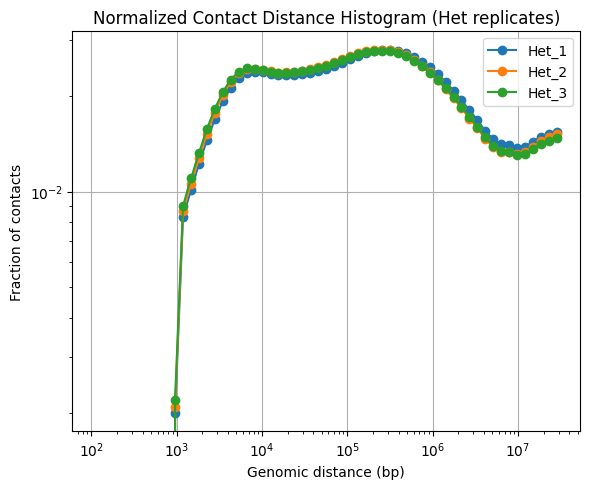

In [9]:
def get_distance_fraction(df, bins):
    cis = df[(df["chrom1"] == df["chrom2"])].copy()
    cis["distance"] = abs(cis["pos2"] - cis["pos1"])
    cis = cis[cis["distance"] > 0]
    hist, _ = np.histogram(cis["distance"], bins=bins)
    return hist / hist.sum()

bins = np.logspace(2, 7.5, num=60)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(6, 5))
for i, Het in enumerate([Het_1, Het_2, Het_3], 1):
    frac = get_distance_fraction(Het, bins)
    plt.plot(bin_centers, frac, marker='o', label=f'Het_{i}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Fraction of contacts")
plt.title("Normalized Contact Distance Histogram (Het replicates)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

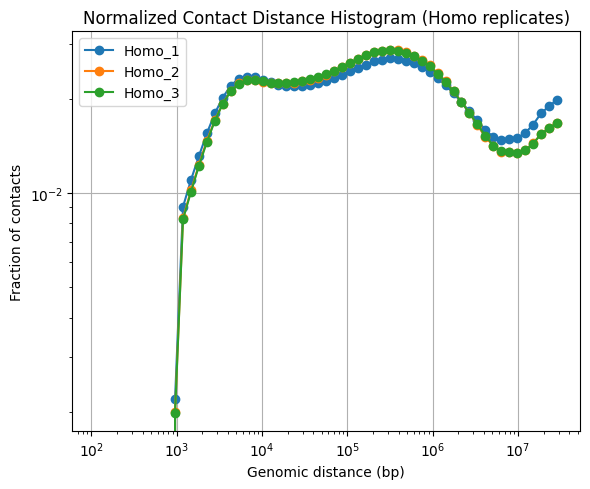

In [11]:
def get_distance_fraction(df, bins):
    cis = df[(df["chrom1"] == df["chrom2"]) & (df["pair_type"] == "UU")].copy()
    cis["distance"] = abs(cis["pos2"] - cis["pos1"])
    cis = cis[cis["distance"] > 0]
    hist, _ = np.histogram(cis["distance"], bins=bins)
    return hist / hist.sum()

bins = np.logspace(2, 7.5, num=60)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(6, 5))
for i, Homo in enumerate([Homo_1, Homo_2, Homo_3], 1):
    frac = get_distance_fraction(Homo, bins)
    plt.plot(bin_centers, frac, marker='o', label=f'Homo_{i}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Fraction of contacts")
plt.title("Normalized Contact Distance Histogram (Homo replicates)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

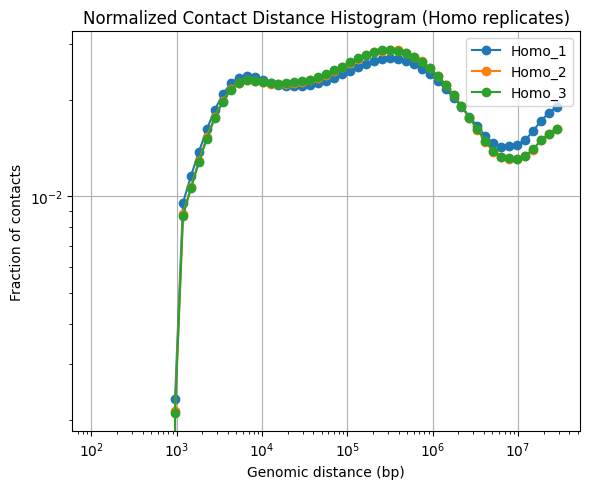

In [10]:
def get_distance_fraction(df, bins):
    cis = df[(df["chrom1"] == df["chrom2"])].copy()
    cis["distance"] = abs(cis["pos2"] - cis["pos1"])
    cis = cis[cis["distance"] > 0]
    hist, _ = np.histogram(cis["distance"], bins=bins)
    return hist / hist.sum()

bins = np.logspace(2, 7.5, num=60)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(6, 5))
for i, homo_sample in enumerate([Homo_1, Homo_2, Homo_3], 1):
    frac = get_distance_fraction(homo_sample, bins)
    plt.plot(bin_centers, frac, marker='o', label=f'Homo_{i}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Fraction of contacts")
plt.title("Normalized Contact Distance Histogram (Homo replicates)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


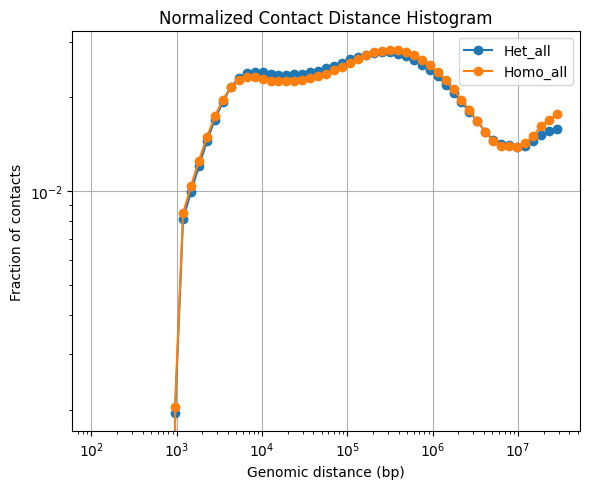

In [12]:
def get_distance_fraction(df, bins):
    cis = df[(df["chrom1"] == df["chrom2"]) & (df["pair_type"] == "UU")].copy()
    cis["distance"] = abs(cis["pos2"] - cis["pos1"])
    cis = cis[cis["distance"] > 0]
    hist, _ = np.histogram(cis["distance"], bins=bins)
    return hist / hist.sum()

bins = np.logspace(2, 7.5, num=60)
bin_centers = (bins[:-1] + bins[1:]) / 2

samples = [Het_all, Homo_all]
labels = ['Het_all', 'Homo_all']

plt.figure(figsize=(6, 5))
for sample, label in zip(samples, labels):
    frac = get_distance_fraction(sample, bins)
    plt.plot(bin_centers, frac, marker='o', label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Fraction of contacts")
plt.title("Normalized Contact Distance Histogram")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


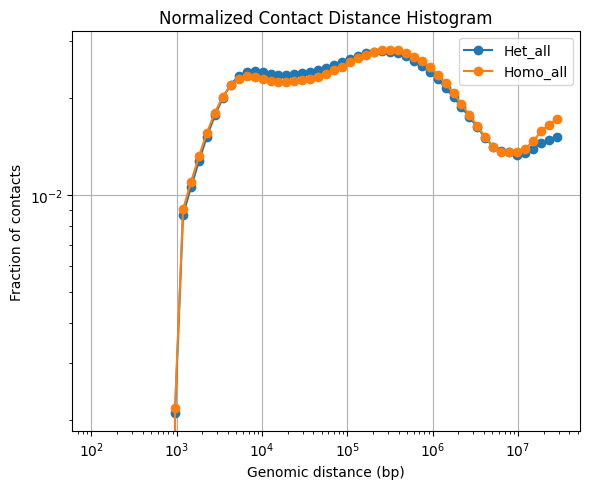

In [13]:
def get_distance_fraction(df, bins):
    cis = df[(df["chrom1"] == df["chrom2"])].copy()
    cis["distance"] = abs(cis["pos2"] - cis["pos1"])
    cis = cis[cis["distance"] > 0]
    hist, _ = np.histogram(cis["distance"], bins=bins)
    return hist / hist.sum()

bins = np.logspace(2, 7.5, num=60)
bin_centers = (bins[:-1] + bins[1:]) / 2

samples = [Het_all, Homo_all]
labels = ['Het_all', 'Homo_all']

plt.figure(figsize=(6, 5))
for sample, label in zip(samples, labels):
    frac = get_distance_fraction(sample, bins)
    plt.plot(bin_centers, frac, marker='o', label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Fraction of contacts")
plt.title("Normalized Contact Distance Histogram")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np

# ===== 示例：六个样本 DataFrame 列表 =====
samples = [Het_1, Het_2, Het_3, Homo_1, Homo_2, Homo_3]
labels = ['Het_1', 'Het_2', 'Het_3', 'Homo_1', 'Homo_2', 'Homo_3']

# ===== 统计函数 =====
def get_trans_stats(df):
    trans = df[df["chrom1"] != df["chrom2"]]
    trans_count = len(trans)
    total_count = len(df)
    ratio = trans_count / total_count if total_count > 0 else np.nan
    return trans_count, total_count, ratio

# ===== 逐个样本计算并存储 =====
results = []
for label, sample in zip(labels, samples):
    trans_count, total_count, ratio = get_trans_stats(sample)
    print(f"{label}: trans = {trans_count}, total = {total_count}, ratio = {ratio:.4f}")
    results.append({
        'sample': label,
        'trans_count': trans_count,
        'total_count': total_count,
        'trans_ratio': ratio
    })

# ===== 保存为 CSV =====
results_df = pd.DataFrame(results)
results_df.to_csv("../all_trans_ratio_stats.csv", index=False)


Het_1: trans = 27498048, total = 69183452, ratio = 0.3975
Het_2: trans = 25558228, total = 67906219, ratio = 0.3764
Het_3: trans = 24578521, total = 65542944, ratio = 0.3750
Homo_1: trans = 22461472, total = 64946882, ratio = 0.3458
Homo_2: trans = 21144696, total = 64823948, ratio = 0.3262
Homo_3: trans = 22380604, total = 68617030, ratio = 0.3262


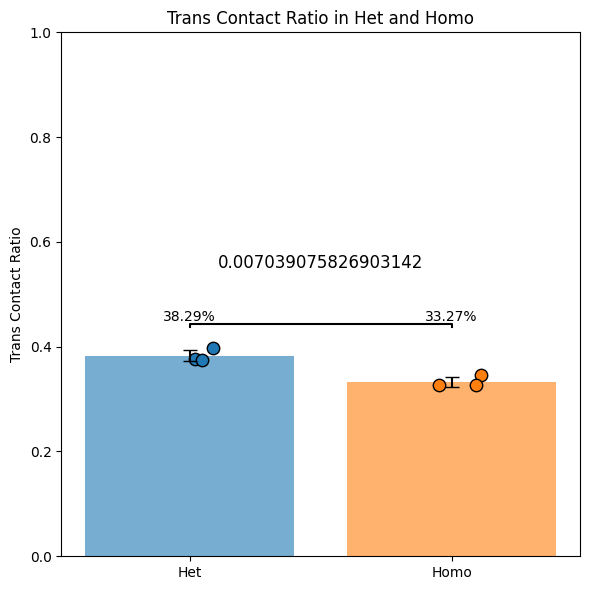

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

results_df = pd.read_csv("../all_trans_ratio_stats.csv")

# 如果你已经有 results_df，直接从中提取
het_vals = results_df[results_df['sample'].str.startswith("Het")]['trans_ratio'].values
homo_vals = results_df[results_df['sample'].str.startswith("Homo")]['trans_ratio'].values

# 均值与标准差
het_mean, het_std = het_vals.mean(), het_vals.std()
homo_mean, homo_std = homo_vals.mean(), homo_vals.std()

# t 检验
t_stat, p_val = ttest_ind(het_vals, homo_vals, equal_var=False)

# 开始画图
fig, ax = plt.subplots(figsize=(6, 6))
group_names = ['Het', 'Homo']
means = [het_mean, homo_mean]
errors = [het_std, homo_std]

# 柱状图
bar_container = ax.bar(group_names, means, yerr=errors, capsize=5,
                       color=['#1f77b4', '#ff7f0e'], alpha=0.6)

# 添加散点（带抖动）
np.random.seed(0)
x_jitter = 0.05
ax.scatter(np.random.normal(0, x_jitter, size=len(het_vals)), het_vals,
           color='#1f77b4', edgecolor='black', s=80)
ax.scatter(np.random.normal(1, x_jitter, size=len(homo_vals)), homo_vals,
           color='#ff7f0e', edgecolor='black', s=80)

y_max = max(means) + max(errors) + 0.05
# 添加均值文本
for i, (mean, std) in enumerate(zip(means, errors)):
    ax.text(i, y_max, f"{mean:.2%}", ha='center', va='bottom', fontsize=10)

# 显著性线
ax.plot([0, 0, 1, 1], [y_max - 0.005, y_max, y_max, y_max - 0.005], color='black')

# p 值标注
if p_val < 0.001:
    p_text = '***'
elif p_val < 0.01:
    p_text = '**'
elif p_val < 0.05:
    p_text = '*'
else:
    p_text = f"p = {p_val:.2f}"
ax.text(0.5, y_max+0.1, p_val, ha='center', va='bottom', fontsize=12)

# 设置样式
ax.set_ylabel('Trans Contact Ratio')
ax.set_title('Trans Contact Ratio in Het and Homo')
ax.set_ylim(0, 1)
ax.set_xticks([0, 1])
ax.set_xticklabels(group_names)
plt.tight_layout()
plt.savefig("../plots/trans_pairs_ratio.pdf")            
plt.show()


In [36]:
# === 1. 读取 BED 文件 ===
cluster_bed_file ="/lustre/home/acct-medlqian/medlqian-loop3/database/olfactory_receptor_information/OR_cluster_information.bed"
cluster_bed = pd.read_csv(cluster_bed_file, sep="\t", header=None,
                  names=["chrom", "start", "end", "name"], index_col=False)
print(cluster_bed)
len(cluster_bed)

    chrom      start        end           name
0    chr1   92475925   92623412   OR_cluster_1
1    chr1  172950409  174451277   OR_cluster_2
2    chr2   36285023   37332772   OR_cluster_3
3    chr2   85330779   90403897   OR_cluster_4
4    chr2  111230360  112167997   OR_cluster_5
..    ...        ...        ...            ...
58  chr17   33168447   33275644  OR_cluster_59
59  chr17   37083871   38336643  OR_cluster_60
60  chr19   11826803   13921866  OR_cluster_61
61   chrX   49672333   50428498  OR_cluster_62
62   chrX   74569153   74762879  OR_cluster_63

[63 rows x 4 columns]


63

In [38]:
import pandas as pd

# === 定义函数 ===
def assign_cluster_overlap(df, cluster_bed, chrom_col, pos_col, suffix, window=0):
    merged = pd.merge(df, cluster_bed,
                      left_on=chrom_col,
                      right_on='chrom',
                      suffixes=('', f'_{suffix}'))

    if window > 0:
        merged['pos_start'] = merged[pos_col] - window
        merged['pos_end'] = merged[pos_col] + window
    else:
        merged['pos_start'] = merged[pos_col]
        merged['pos_end'] = merged[pos_col]

    in_region = ~((merged['pos_end'] < merged['start']) | (merged['pos_start'] > merged['end']))
    return merged[in_region][['pair_index', 'chrom']]

# === 样本列表 ===
samples = {
    'Het_1': Het_1,
    'Het_2': Het_2,
    'Het_3': Het_3,
    'Homo_1': Homo_1,
    'Homo_2': Homo_2,
    'Homo_3': Homo_3
}

# === 存储结果 ===
results = []

for name, df in samples.items():
    df = df.copy()
    df['pair_index'] = df.index

    # 左右端匹配
    left = assign_cluster_overlap(df, cluster_bed, 'chrom1', 'pos1', '1', window=0)
    right = assign_cluster_overlap(df, cluster_bed, 'chrom2', 'pos2', '2', window=0)

    # 合并匹配成功的左右端
    merged = pd.merge(left, right, on='pair_index', suffixes=('_1', '_2'))

    # 判断 cis/trans
    merged['type'] = merged.apply(lambda row: 'cis' if row['chrom_1'] == row['chrom_2'] else 'trans', axis=1)

    # 统计 count
    cis_count = (merged['type'] == 'cis').sum()
    trans_count = (merged['type'] == 'trans').sum()

    results.append({
        'sample': name,
        'cis': cis_count,
        'trans': trans_count,
        'total': cis_count + trans_count
    })

# 转换为 DataFrame 方便展示
results_df = pd.DataFrame(results)
print(results_df)


   sample     cis  trans   total
0   Het_1  312822  50758  363580
1   Het_2  324698  48632  373330
2   Het_3  312552  45320  357872
3  Homo_1  340820  21384  362204
4  Homo_2  353877  25670  379547
5  Homo_3  369111  23481  392592


In [53]:
# === 1. 读取 BED 文件 ===
enhancer_bed_file ="/lustre/home/acct-medlqian/medlqian-loop3/database/enhancer/OR_63_enhancers.bed"
enhancer_bed = pd.read_csv(enhancer_bed_file, sep="\t", header=None,
                  names=["chrom", "start", "end", "name"], index_col=False)
print(enhancer_bed)
len(enhancer_bed)

   chrom      start        end        name
0   chr1   92545930   92546383      Rhodes
1   chr1  173190529  173190944         Kea
2   chr1  173212162  173212558     Kythnos
3   chr1  173265692  173266108    Serifos 
4   chr1  174035928  174036370  Astypalea 
..   ...        ...        ...         ...
58  chr7  140186968  140187491      Fourni
59  chr9   19651135   19651501     Donousa
60  chr9   37687616   37688065     Kimolos
61  chr9   39951989   39952440       Psara
62  chrX   74559087   74559525  Schoinousa

[63 rows x 4 columns]


63

In [54]:
# 向两侧扩展 10kb
enhancer_bed["start"] = enhancer_bed["start"] - 25_000
enhancer_bed["end"] = enhancer_bed["end"] + 25_000

# 防止 start 小于 0（可选）
enhancer_bed["start"] = enhancer_bed["start"].clip(lower=0)


In [55]:
import pandas as pd

# === 定义函数 ===
def assign_enhancer_overlap(df, enhancer_bed, chrom_col, pos_col, suffix, window=0):
    merged = pd.merge(df, enhancer_bed,
                      left_on=chrom_col,
                      right_on='chrom',
                      suffixes=('', f'_{suffix}'))

    if window > 0:
        merged['pos_start'] = merged[pos_col] - window
        merged['pos_end'] = merged[pos_col] + window
    else:
        merged['pos_start'] = merged[pos_col]
        merged['pos_end'] = merged[pos_col]

    in_region = ~((merged['pos_end'] < merged['start']) | (merged['pos_start'] > merged['end']))
    return merged[in_region][['pair_index', 'chrom']]

# === 样本列表 ===
samples = {
    'Het_1': Het_1,
    'Het_2': Het_2,
    'Het_3': Het_3,
    'Homo_1': Homo_1,
    'Homo_2': Homo_2,
    'Homo_3': Homo_3
}

# === 存储结果 ===
results = []

for name, df in samples.items():
    df = df.copy()
    df['pair_index'] = df.index

    # 左右端匹配
    left = assign_enhancer_overlap(df, enhancer_bed, 'chrom1', 'pos1', '1', window=0)
    right = assign_enhancer_overlap(df, enhancer_bed, 'chrom2', 'pos2', '2', window=0)

    # 合并匹配成功的左右端
    merged = pd.merge(left, right, on='pair_index', suffixes=('_1', '_2'))

    # 判断 cis/trans
    merged['type'] = merged.apply(lambda row: 'cis' if row['chrom_1'] == row['chrom_2'] else 'trans', axis=1)

    # 统计 count
    cis_count = (merged['type'] == 'cis').sum()
    trans_count = (merged['type'] == 'trans').sum()

    results.append({
        'sample': name,
        'cis': cis_count,
        'trans': trans_count,
        'total': cis_count + trans_count
    })

# 转换为 DataFrame 方便展示
results_df = pd.DataFrame(results)
print(results_df)


   sample    cis  trans  total
0   Het_1  19389   1831  21220
1   Het_2  20176   1712  21888
2   Het_3  20012   1544  21556
3  Homo_1  18200    176  18376
4  Homo_2  18494    218  18712
5  Homo_3  19691    218  19909
